In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.metrics import accuracy_score
from scipy import stats

In [33]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=20)

In [108]:
def ttest(res_1,res_2):
    stat, p_value = stats.ttest_ind(res_1, res_2)
    print("p value",p_value)
    return p_value

def significance_level(p_value):
    if p_value > 0.1:
        level = None
    elif (p_value <= 0.1) and (p_value > 0.05):
        level = '.'
    elif (p_value <= 0.05) and (p_value > 0.01):
        level = '*'
    elif (p_value <= 0.01) and (p_value > 0.001):
        level = '**'
    else:
        level = '***'
    return level

def add_bar(x_loc,res_1,res_2,y,ax):
    """
    model_1,model_2 : int of the model tested
    ax : axis from matplotlib figure
    """
    ax.plot([x_loc,x_loc],[y+0.01,y+0.03],'k')
    ax.plot([x_loc,x_loc+1],[y+0.03,y+0.03],'k')
    ax.plot([x_loc+1,x_loc+1],[y+0.03,y+0.01],'k')

    ax.text((x_loc+1-x_loc)/2+x_loc, y+0.03, significance_level(ttest(res_1,res_2)),
         {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
          'bbox': dict( fc="white", ec="white", pad=2)})
    return y+0.05

In [109]:
with open('validation.json', 'r') as openfile:
    dict_acc = json.load(openfile)

In [110]:
lists = ['MAR_RESNET34_RESIZED_256_ALL','MAR_RESNET34_PADDED_256_ALL_NEW','MAR_RESNET34_PADDED_256_ALL']

MAR_RESNET34_RESIZED_256_ALL
[0.977, 0.975, 0.983, 0.985, 0.977]
p value 0.3142511488746048
MAR_RESNET34_PADDED_256_ALL_NEW
[0.981, 0.979, 0.989, 0.981, 0.981]
p value 0.7133951761564796
MAR_RESNET34_RESIZED_256_ALL
MAR_RESNET34_PADDED_256_ALL_NEW
MAR_RESNET34_PADDED_256_ALL


(0.0, 1.2)

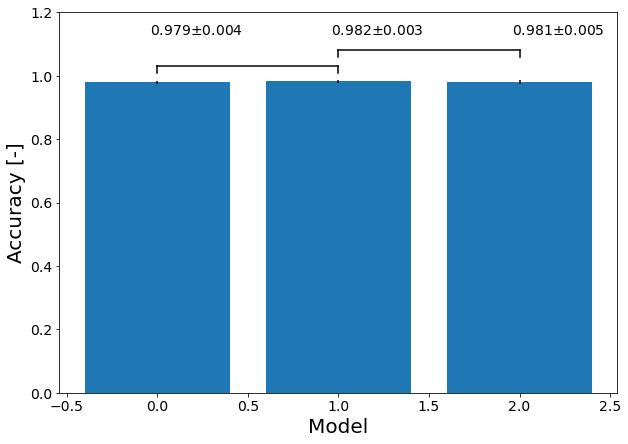

In [115]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(0,3)

ax.bar(
    x=pos,
    height=pd.DataFrame.from_dict(dict_acc)[lists].mean(axis=0).values,
    yerr=pd.DataFrame.from_dict(dict_acc)[lists].std(axis=0).values)

tests = [
    ("MAR_RESNET34_RESIZED_256_ALL","MAR_RESNET34_PADDED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET34_PADDED_256_ALL")
]

y = 1 # where to start the bar
for i_, (model_1, model_2) in enumerate(tests) :
    print(model_1)
    print(dict_acc[model_1])

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]
    y = add_bar(pos[i_],res_1,res_2,y,ax=ax)
for i_, model in enumerate(lists):
    print(model)
    plt.text(
        pos[i_]-0.04, 
        1.13, 
        f"{np.round(np.mean(dict_acc[model]),3)}$\pm${np.round(np.std(dict_acc[model]),3)}",
        fontdict={'fontsize':14})
plt.ylabel('Accuracy [-]')
plt.xlabel('Model') 

plt.ylim(0, 1.2)